<a href="https://colab.research.google.com/github/xiangyizan/tensorflow_study/blob/master/keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
# from tensorflow.examples.tutorials.mnist import input_data
mnst = keras.datasets.mnist
(x_, y_), (x_1, y_1) = mnst.load_data()
print(x_.shape, y_.shape)
print(keras.backend.image_data_format())
# print(tf.__version__)

(60000, 28, 28) (60000,)
channels_last


In [0]:
num_classes=10
img_rows, img_cols = 28, 28
if keras.backend.image_data_format() == "channel_first":
  x_ = x_.reshape(x_.shape[0],1, img_rows, img_cols)
  x_1 = x_1.reshape(x_1.shape[0],1,img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_ = x_.reshape(x_.shape[0], img_rows, img_cols, 1)
  x_1 = x_1.reshape(x_1.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
x_ = x_.astype('float32')
x_1 = x_1.astype('float32')
x_ = x_ /255.0
x_1 = x_1 / 255.0
y_ = keras.utils.to_categorical(y_, num_classes)
y_1 = keras.utils.to_categorical(y_1, num_classes)


In [13]:
model = Sequential()
model.add(
    Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=input_shape)
)
model.add(
    MaxPooling2D(pool_size=(2,2))
)
model.add(
    Conv2D(64, kernel_size=(5, 5), activation='relu')
)
model.add(
    MaxPooling2D(pool_size=(2,2))
)
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_, y_, batch_size=128, epochs=20, validation_data=(x_1, y_1))
score = model.evaluate(x_1, y_1)
print('test loss:', score[0])
print('test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1620 - accuracy: 0.9510 - val_loss: 0.0376 - val_accuracy: 0.9883
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0341 - val_accuracy: 0.9893
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0244 - val_accuracy: 0.9918
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0241 - val_accuracy: 0.9924
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0270 - val_accuracy: 0.9921
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0306 - val_accuracy: 0.9903
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0287 - val_accuracy: 0.9917
Epoch 

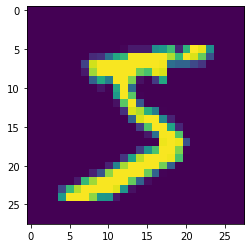

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_[0])
plt.show()

# 新段落

In [0]:


tf.reset_default_graph()

# Hyper Parameters
learning_rate = 0.01    # 学习率
n_steps = 28            # LSTM 展开步数（时序持续长度）
n_inputs = 28           # 输入节点数
n_hiddens = 64         # 隐层节点数
n_layers = 2            # LSTM layer 层数
n_classes = 10          # 输出节点数（分类数目）

# data
mnist = 
test_x = mnist.test.images
test_y = mnist.test.labels

# tensor placeholder
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32, [None, n_steps * n_inputs], name='x_input')     # 输入
    y = tf.placeholder(tf.float32, [None, n_classes], name='y_input')               # 输出
    keep_prob = tf.placeholder(tf.float32, name='keep_prob_input')           # 保持多少不被 dropout
    batch_size = tf.placeholder(tf.int32, [], name='batch_size_input')       # 批大小

# weights and biases
with tf.name_scope('weights'):
    Weights = tf.Variable(tf.truncated_normal([n_hiddens, n_classes],stddev=0.1), dtype=tf.float32, name='W')
    tf.summary.histogram('output_layer_weights', Weights)
with tf.name_scope('biases'):
    biases = tf.Variable(tf.random_normal([n_classes]), name='b')
    tf.summary.histogram('output_layer_biases', biases)

# RNN structure
def RNN_LSTM(x, Weights, biases):
    # RNN 输入 reshape
    x = tf.reshape(x, [-1, n_steps, n_inputs])
    # 定义 LSTM cell
    # cell 中的 dropout
    def attn_cell():
        lstm_cell = tf.contrib.rnn.BasicLSTMCell(n_hiddens)
        with tf.name_scope('lstm_dropout'):
            return tf.contrib.rnn.DropoutWrapper(lstm_cell, output_keep_prob=keep_prob)
    # attn_cell = tf.contrib.rnn.DropoutWrapper(lstm_cell, output_keep_prob=keep_prob)
    # 实现多层 LSTM
    # [attn_cell() for _ in range(n_layers)]
    enc_cells = []
    for i in range(0, n_layers):
        enc_cells.append(attn_cell())
    with tf.name_scope('lstm_cells_layers'):
        mlstm_cell = tf.contrib.rnn.MultiRNNCell(enc_cells, state_is_tuple=True)
    # 全零初始化 state
    _init_state = mlstm_cell.zero_state(batch_size, dtype=tf.float32)
    # dynamic_rnn 运行网络
    outputs, states = tf.nn.dynamic_rnn(mlstm_cell, x, initial_state=_init_state, dtype=tf.float32, time_major=False)
    # 输出
    #return tf.matmul(outputs[:,-1,:], Weights) + biases
    return tf.nn.softmax(tf.matmul(outputs[:,-1,:], Weights) + biases)

with tf.name_scope('output_layer'):
    pred = RNN_LSTM(x, Weights, biases)
    tf.summary.histogram('outputs', pred)
# cost
with tf.name_scope('loss'):
    #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
    cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred),reduction_indices=[1]))
    tf.summary.scalar('loss', cost)
# optimizer
with tf.name_scope('train'):
    train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# accuarcy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
with tf.name_scope('accuracy'):
    accuracy = tf.metrics.accuracy(labels=tf.argmax(y, axis=1), predictions=tf.argmax(pred, axis=1))[1]
    tf.summary.scalar('accuracy', accuracy)

merged = tf.summary.merge_all()

init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())

with tf.Session() as sess:
    sess.run(init)
    train_writer = tf.summary.FileWriter("E://logs//train",sess.graph)
    test_writer = tf.summary.FileWriter("E://logs//test",sess.graph)
    # training
    step = 1
    for i in range(2000):
        _batch_size = 128
        batch_x, batch_y = mnist.train.next_batch(_batch_size)

        sess.run(train_op, feed_dict={x:batch_x, y:batch_y, keep_prob:0.5, batch_size:_batch_size})
        if (i + 1) % 100 == 0:
            #loss = sess.run(cost, feed_dict={x:batch_x, y:batch_y, keep_prob:1.0, batch_size:_batch_size})
            #acc = sess.run(accuracy, feed_dict={x:batch_x, y:batch_y, keep_prob:1.0, batch_size:_batch_size})
            #print('Iter: %d' % ((i+1) * _batch_size), '| train loss: %.6f' % loss, '| train accuracy: %.6f' % acc)
            train_result = sess.run(merged, feed_dict={x:batch_x, y:batch_y, keep_prob:1.0, batch_size:_batch_size})
            test_result = sess.run(merged, feed_dict={x:test_x, y:test_y, keep_prob:1.0, batch_size:test_x.shape[0]})
            train_writer.add_summary(train_result,i+1)
            test_writer.add_summary(test_result,i+1)

    print("Optimization Finished!")
    # prediction
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={x:test_x, y:test_y, keep_prob:1.0, batch_size:test_x.shape[0]}))